# Practice Lab: Linear Regression

In this lab, we will delve into the practical application of linear regression, a fundamental technique in the field of machine learning. Through this exercise, you will gain hands-on experience in
- implementing linear regression models,
- assessing their performance, and
- interpreting the results.

To run the labs, you will need two things:

* An installation of `Python3`, which is the specific version of `Python`  used in the labs.
* Access to  `Jupyter`, a very popular `Python` interface that runs code through a file called a *notebook*.

You can download and install  `Python3`   by following the instructions available at [anaconda.com/anaconda-navigator](https://www.anaconda.com/anaconda-navigator).

 There are a number of ways to get access to `Jupyter`. Here are just a few:

 * Using `Anaconda`, available at [anaconda.com/download](https://www.anaconda.com/download).
 * Using Google's `Colaboratory` service: [colab.research.google.com/](https://colab.research.google.com/).
 * Using `JupyterHub`, available at [jupyter.org/hub](https://jupyter.org/hub).
 * Using your own `jupyter` installation. Installation instructions are available at [jupyter.org/install](https://jupyter.org/install).

 For more resources about `Python` in general, you may want to consult the tutorial at [docs.python.org/3/tutorial/](https://docs.python.org/3/tutorial/).


## 1. Import the necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt


#### Importing Libraries:
In the cell above, we imported the required libraries.
- `pandas` is used for data manipulation and analysis.
- `matplotlib.pyploy` for data visualization.

## 2. Load data

### Case 1: Simple Linear Regression

This type of regression involves a single independent variable and a dependent variable.

Here, we load the housing data from a CSV file named `uni_housing.csv` into a pandas DataFrame called data. This assumes that the CSV file is in the same directory (folder) as the Python script.

In [2]:
# 1. Load data
data_1 = pd.read_csv('uni_housing.csv')

#### a. Data preprocessing
- Clean and preprocess the data, handle missing values, and encode categorical variables if necessary.

In [4]:
# Overview of data
data_1.head(10)

,price,size
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420
5,10850000,7500
6,10150000,8580
7,10150000,16200
8,9870000,8100
9,9800000,5750


In [5]:
# Statistics summary
data_1.describe()

,price,size
count,5.450000e+02,545.000000
mean,4.766729e+06,5150.541284
std,1.870440e+06,2170.141023
min,1.750000e+06,1650.000000
25%,3.430000e+06,3600.000000
50%,4.340000e+06,4600.000000
75%,5.740000e+06,6360.000000
max,1.330000e+07,16200.000000


In [6]:
# Data Types
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   545 non-null    int64
 1   size    545 non-null    int64
dtypes: int64(2)
memory usage: 8.6 KB


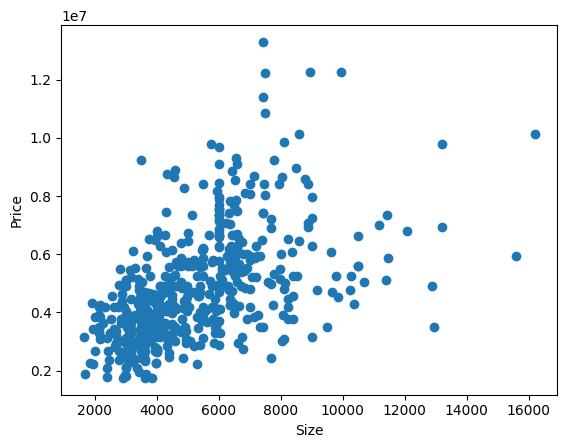

In [39]:
# Data Visualization

plt.figure()

plt.scatter(data_1['size'], data_1['price'])

# Add more
plt.xlabel('Size')
plt.ylabel('Price')

plt.show()

#### b. Feature Selection:
Choose the most relevant features that contribute to the prediction of the target variable. In this case since we are just using a single independent variable and a dependent variable, we don't have to do any selection.

In [7]:
# Shape
data_1.shape

(545, 2)

We've gathered data on both the size of the house (independent variable) and the corresponding prices (dependent variable). Our dataset consists of 545 observations across 2 columns.

#### c. Model Selection and Training:

#### Splitting Data:
We split the dataset into two parts: independent variable (features)(size) X and dependent variable (target) (price) y.
- X contains the independent variables, which are the columns 'area' (size of the house).
- y contains the dependent variable, which is the column 'price' (selling price of the house).

In [16]:
# Split the data into features (X) and target (y)

X = data_1[['size']]

y = data_1['price']

In [17]:
X.head()

,size
0,7420
1,8960
2,9960
3,7500
4,7420


In [18]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

#### Training the Model:

- We are using the **Linear regression model** to predict housing prices based on the size of the house.
- We instantiate a `LinearRegression` model and then fit it to the training data using `fit(X, y)`.
- This process involves adjusting the model's coefficients to minimize the difference between the actual and predicted values of the target variable (`price`).

In [19]:
# To access and utilize the LinearRegression
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()


**Recall**
- `Scikit-learn`, often abbreviated as `sklearn`, is an open-source machine learning library in Python.
- It is a powerful Python library that provides tools for machine learning, including linear regression models, along with other algorithms for classification, clustering, and dimensionality reduction.
- The `LinearRegression` class in scikit-learn represents a linear regression model.

Next, we create an instance of the LinearRegression class from the scikit-learn library. Once the model object is created, we can use it to train the linear regression model on your dataset using the `fit()` method and make predictions using the `predict()` method.

In [20]:
# Train the linear regression model
regressor.fit(X,y)

LinearRegression()

In [40]:
regressor.coef_

array([461.97489427])

In [41]:
regressor.intercept_

2387308.48239643

It internally uses the **Ordinary Least Squares** (OLS) method to estimate the coefficients (weights) of the linear equation.

After training a machine learning model, we typically want to assess its performance on unseen data or use it to make predictions on new data instances. The `predict()` method in scikit-learn allows you to make predictions using our trained model.

In [42]:
# Predicting prices for new data points
new_sizes = pd.DataFrame({'size':[3000,6000]})


In [43]:
new_sizes

,size
0,3000
1,6000


In [44]:

predicted_prices = regressor.predict(new_sizes)
predicted_prices

array([3773233.16521478, 5159157.84803313])

In [23]:
regressor.coef_

array([461.97489427])

In [45]:
# Predict prices for the original data points assigned to `y_pred`
y_pred = regressor.predict(X)

In [46]:
y_pred[:5]

array([5815162.19790048, 6526603.53508057, 6988578.42935335,
       5852120.18944231, 5815162.19790048])

In [47]:
y[:5]

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

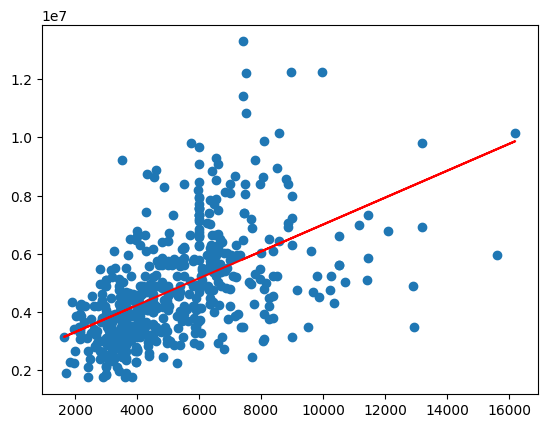

In [26]:
# Visualize the regression line
plt.figure()
# Datapoints
plt.scatter(data_1['size'], data_1['price'])
# Regression Line
plt.plot(X,y_pred, color='red')

plt.show()

This line enables us to obtain predictions for the original data points using the trained linear regression model.

#### Challenges:

House size alone may not capture all the variability in house prices. There could be nonlinear relationships or interactions between features that are not accounted for when using only one predictor variable. As a result, the model's predictive power may be limited, leading to inaccurate predictions, especially for houses with unique characteristics.

______________

## Case 2: Multiple Linear Regression:
This type of regression involves multiple independent variables and a single dependent variable.

Let's consider adding the features bedrooms and bathrooms.

In [28]:
# Load 'housing_3.csv'
data_3 = pd.read_csv('housing_3.csv')
#Overvierw
data_3

,price,size,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1
...,...,...,...,...
540,1820000,3000,2,1
541,1767150,2400,3,1
542,1750000,3620,2,1
543,1750000,2910,3,1


In [ ]:
# Statistics summary


In [30]:
# Shape
data_3.shape

(545, 4)

In [48]:
# Split the data into features (X) and target (y)
X_3 = data_3[['size', 'bedrooms', 'bathrooms']]

y_3 = data_3['price']
X_3

,size,bedrooms,bathrooms
0,7420,4,2
1,8960,4,4
2,9960,3,2
3,7500,4,2
4,7420,4,1
...,...,...,...
540,3000,2,1
541,2400,3,1
542,3620,2,1
543,2910,3,1


In [49]:
# Train the linear regression model
model_3 = LinearRegression()

model_3.fit(X_3,y_3)

LinearRegression()

In [50]:
# Predict prices for the original data points

y_pred_3 = model_3.predict(X_3)

In [51]:
y_pred_3[:5]

array([ 7036627.15462756, 10392020.79073062,  7591864.51496455,
        7066928.17491437,  5650577.65683656])

___________________

## Evaluating the Model:

Evaluating the performance of a trained linear regression model is crucial to understand how well it generalizes to new, unseen data. There are several metrics commonly used to evaluate regression models. Here are some of them:

1. **R-squared (R²)**: It provides an indication of goodness of fit, showing how well the regression model fits the observed data.
- R-squared values range from 0 to 1.
- A value of 0 indicates that the model explains none of the variability of the response data around its mean, while a value of 1 indicates that the model explains all the variability.

To evaluate the model in scikit-learn, you can use the `score()` method or `r2_score` method for simple metrics like R².

In [52]:
# Calculate R2 score
from sklearn.metrics import r2_score

r2_1 = r2_score(y,y_pred)

r2_3 = r2_score(y_3,y_pred_3)

print(r2_1)
print(r2_3)

0.2872931546811469
0.4870830667058762


In [53]:
# Alternatively
regressor.score(X,y)

0.2872931546811469

In [55]:
model_3.score(X_3,y_3)

0.4870830667058762

In this case, the score suggests that the linear regression model explains a small amount of the variance in house prices based on the size of the house. However, there may be other factors not captured by the model that influence house prices.

It could be due to various reasons, such as:

- The feature used for prediction (e.g., area) may not sufficiently capture all the factors that influence house prices.

2. **Mean squared error (MSE)**: We calculate the mean squared error (MSE) between the actual prices (`y`) and the predicted prices (`y_pred`).
- MSE is a measure of the average squared difference between the actual and predicted values.
- Lower values indicate better fit.
- MSE is in the squared units of the target variable. For example, if predicting house prices, MSE would be in squared dollars.

3. **Root Mean Squared Error (RMSE)**: RMSE is the square root of the MSE and provides a measure of how spread out the errors are. Like MSE, lower values are desirable.

4. **Mean Absolute Error (MAE)**: MAE calculates the average of the absolute differences between the predicted and actual values. It's less sensitive to outliers compared to MSE.


We use functions from the metrics module for more detailed metrics like MSE, RMSE, and MAE.

In [58]:
# Calculate the Mean Squared Error
from sklearn.metrics import mean_squared_error

mse_1 = mean_squared_error(y,y_pred)
mse_3 = mean_squared_error(y_3,y_pred_3)

print(mse_1)
print(mse_3)

2488861398180.6567
1791170049977.3193


#### Evaluating the new model (trained with more variables)

In [ ]:
# Calculate R2 score


With a higher R² value of 0.4871, the model now explains around 48.71% of the variance in house prices. This suggests that incorporating additional features such as bathrooms and bedrooms has enhanced the model's ability to explain the variability in house prices compared to using house size alone.

_______________________

# Assignment: Enhancing Predictive Model for House Prices

To better understand the factors influencing house prices, let's incorporate additional relevant features using the dataset `Housing_more.csv`.

Here's your task list:

### 1. Load the Dataset:
   - Load the dataset `Housing_more.csv` or `Housing_more.xlsx`.

### 2. Explore the Data:
   - Determine the number of columns and rows.
   - Check the data types, missing values, and other relevant statistics.

### 3. Data Preprocessing:
   - Clean and preprocess the data, handling any missing values.
   - Encode categorical variables if necessary.

### 4. Feature Selection:
   - Choose the most relevant features that contribute to predicting the target variable (house prices).
   - For example, after encoding categorical variables, consider selecting the following features:
     - **size**, **bedrooms**, **bathrooms**, **stories**, **mainroad**, **guestroom**, **basement**, **hotwaterheating**, **airconditioning**, and **parking**.

### 5. Model Training:
   - Train your regression model using the selected features and the target variable (prices).

### 6. Model Evaluation:
   - Utilize appropriate evaluation metrics to assess the model's performance.
   - Common evaluation metrics for regression models include:
     - R-squared (R²) score

### 7. Documentation:
   - Document each step of your process, including any decisions made or assumptions taken.
   - Provide clear explanations for your feature selection and preprocessing steps.
   - Record your model's performance metrics and any insights gained from the evaluation.

Begin by creating a new notebook and proceed with the tasks outlined above. Good luck!